In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

**SQL Questions** <br />

To answer Question 1 and Question 2a, the Bugs.csv and BugHistory.csv files were first loaded as tables into BigQuery from the Google Cloud Platform, which is where the below SQL commands were run to generate Bugs_A and Bugs_Open.

***Google Cloud Platform Conventions*** <br />

•ea-games-test <-> project name <br />
•bug_tables <-> dataset name in ea-games-test <br />
•Bugs, BugHistory <-> tables in bug_tables

**Question 1** (The output for this table can be found in Bugs_A.csv.)<br />


SELECT  bugs.BugId AS BugId, FullDate, BugHistory.ProgressStatus AS ProgressStatus <br />
FROM `ea-games-test.bug_tables.Bugs` AS Bugs <br />
LEFT JOIN `ea-games-test.bug_tables.BugHistory` AS BugHistory <br />
ON Bugs.BugId = BugHistory.BugId <br />
WHERE Severity = 'A'

**Question 2a** (The output for this table can be found in Bugs_Open.csv.) <br />

SELECT FullDate, Severity, COUNT(*) AS Count <br />
FROM `ea-games-test.bug_tables.Bugs` AS Bugs <br /> 
LEFT JOIN `ea-games-test.bug_tables.BugHistory` AS BugHistory <br /> 
ON Bugs.BugId = BugHistory.BugId <br /> 
WHERE BugHistory.ProgressStatus IN ('Claim Fixed', 'Confirmed', 'Fix Failed', 'In Progress', 'Info Added', 'Pending Build', 'Request Review', 'Submitted') <br /> 
AND Bugs.Severity != 'NULL' <br />
GROUP BY FullDate, Severity <br /> 
ORDER BY FullDate, Severity

In [2]:
#Bugs_Open.csv is the table from Question 2a, generated in BigQuery.
Bugs_Open = pd.read_csv('Bugs_Open.csv')

**Question 2b**

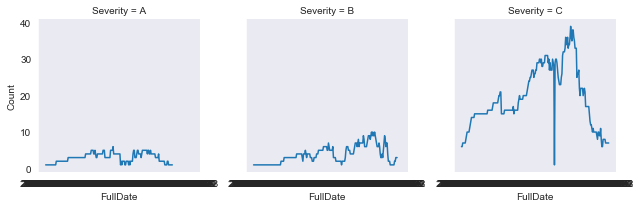

In [3]:
#Daily number of open bugs by Severity
grid = sns.FacetGrid(Bugs_Open, col='Severity')
grid.map(plt.plot, 'FullDate', 'Count');

FullDate Ranges: <br />
•Severity = A: '2016-11-29' to '2017-07-09' <br />
•Severity = B: '2016-11-29' to '2017-07-23' <br />
•Severity = C: '2016-11-29' to '2017-07-23'

**Question 2c** <br />

•For each of the 3 severities, the daily bug count is comparable at the beginning and end of the date interval. This suggests that the long-term trend for each is one of stability, i.e. the number of bugs is not growing faster than they are being solved. <br />
•However, the 'B' and 'C' graphs showed intermediate upward trends before leveling off. It would therefore be wise to monitor these graphs over a larger date sample to either confirm stability or respond strategically to a long-term upward trend. <br />
•There are fewest 'A' bugs (range: 1-6), then 'B' bugs (range: 1-10), then 'C' bugs (range: 1-39). <br />
•On 2017-04-27 there is a sharp drop in graph 'C', corresponding to a count of 1. It is presumed that this a mistake in the data (perhaps all but one of the 'C' bugs weren't recorded that day).

In [4]:
#It appears that on 2017-04-27 there was an error in tracking the 'C' bugs.
Bugs_Open[(Bugs_Open['Severity']=='C') &\
          (Bugs_Open['FullDate'] >= '2017-04-25') &\
          (Bugs_Open['FullDate'] <= '2017-04-29')]

,FullDate,Severity,Count
443,2017-04-25,C,29
446,2017-04-26,C,28
447,2017-04-27,C,1
450,2017-04-28,C,29
453,2017-04-29,C,30


**Question 3a** <br />

The Adjusted R-squared would be most appropriate. It is a superior choice to Multiple R-squared because, unlike Multiple R-squared, it penalizes the inclusion of explanatory variables that contribute minimal predictive value, thereby reducing the undesired effect of overfitting.

**Question 3b** <br />

Given that this is a linear regression model, we would need the assumptions of linear regression to be true. The assumptions are:


•*Multivariate Normality*: The residuals (i.e. error terms) must be normally distributed. <br />
•*Homoscedasticity*: The residuals must have approximately the same variance as one another. <br />
•*Minimal Multicollinearity*: The explanatory variables must be minimally correlated with one another. <br />
•*Minimal Autocorrelation*: The dependence between residuals must be minimal. <br />
•*Linearity*: There must be a linear relationship between the target variable (BugWeight) and each of the explanatory variables (Severity, UserPath, Priority, ReproRate). <br />

In practice, we don't actually expect any one of these conditions to be satisfied perfectly; it would be unreasonable to require a set of variables to have no correlation whatsoever, or a set of error terms to all be exactly Gaussian. Instead we make a judgment call for each of the conditions to decide if linear regression would ultimately be appropriate or not.

**Question 3c** <br />

I would remove Priority because, after one-hot encoding is applied, we see that none of its classes have a significance code of at least one star. This suggests that the classes of Priority, and therefore Priority as a whole, contribute little predictive value to BugWeight.